In [ ]:
# Importing Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
## Checking the version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")


Tensorflow Version 2.15.0


In [ ]:
os.getcwd()

'/content'

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ["GPU", "CPU"]

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0 :
        print(f"(device) is available")
        print(f"Details >> {out}")

    else:
        print(f"(device) isn't available")

(device) is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
(device) is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


**Creating a Simple Classifier Using Keras on MNIST data **

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full, y_train_full), (X_test, y_test ) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
print(f"data type of X_train_full : {X_train_full.dtype},\n shape of X_train_full :{X_train_full.shape}")

data type of X_train_full : uint8,
 shape of X_train_full :(60000, 28, 28)


In [ ]:
# Create a Validation Data set from the full traing data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scaled the test set as well
X_test = X_test / 255

In [ ]:
# TRAIN = 55000
# VALID = 5000
# TEST = 10000

In [ ]:
len(X_train_full[5000:])

55000

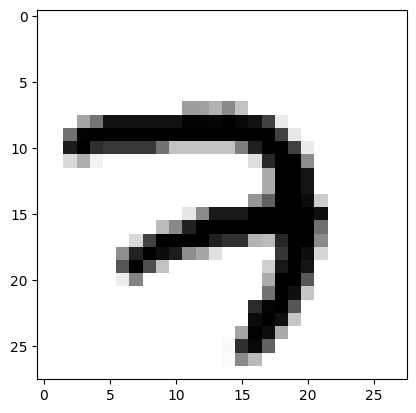

In [ ]:
## Lets View the Some Data

plt.imshow(X_train[0], cmap = 'binary')
plt.show()

<Axes: >

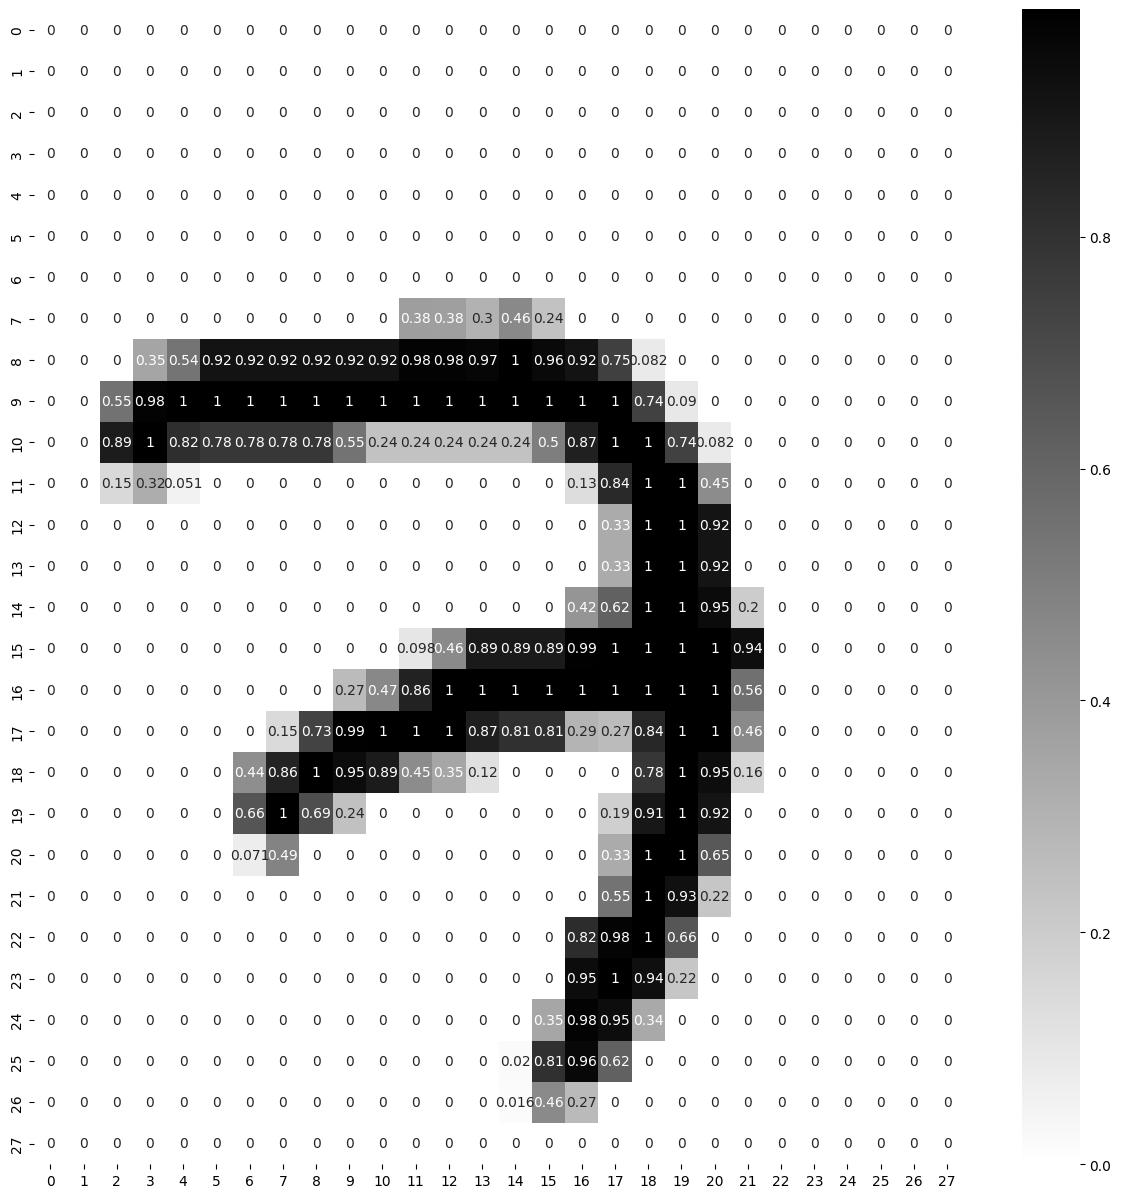

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(X_train[0], annot = True, cmap = 'binary')

In [ ]:
28*28


784

In [ ]:
0,1,2,3,4,5,6,7,8,9

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
## Creating Layers of ANN or Defining Our Neural Networks
## METHOD 1

LAYERS = [tf.keras.layers.Flatten(input_shape = [28, 28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation = "softmax", name ="outputLayer" )]

model_clf = tf.keras.models.Sequential(LAYERS)


In [ ]:
# ## METHOD 2

# from keras.models import Sequential
# from keras.layers import Dense, Flatten

# ## Define the Model

# model = Sequential()
# model.add(Dense(units = 64, activation = "relu", input_dim = 100))
# model.add(Dense(units = 10, activation = "softmax"))

# ## Compile the model

# #model.compile(loss = 'categotical_crossenttropy', optimizer = 'sgd', metrics = ['accuracy'])

# ## train the model
# #model.fit(X_train, y _train, epocha = 5, batch_size = 32)


In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## FirstLayer + SecondLayer + Bias
784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total Parametr to be trained
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()  ## one array of weightd and one array of Biases


[array([[-0.00189658, -0.02151236, -0.01612637, ..., -0.01083104,
         -0.02801185,  0.00390219],
        [-0.06533267, -0.02343981, -0.02637416, ..., -0.01741137,
          0.03266841, -0.06016728],
        [ 0.04174642,  0.00276911, -0.02104814, ..., -0.00997391,
          0.02358652,  0.03002852],
        ...,
        [ 0.07190236, -0.03395671,  0.02777556, ...,  0.04089377,
          0.03778809, -0.00533716],
        [-0.00279442, -0.05340199,  0.0327444 , ...,  0.00589814,
         -0.0516773 ,  0.03349026],
        [-0.00488683,  0.05968839, -0.01769174, ..., -0.05088632,
         -0.0059877 , -0.00048474]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:
weights , biases = hidden1.get_weights()

In [ ]:
print("shapes\n", weights.shape, '\n')
weights

shapes
 (784, 300) 



array([[-0.00189658, -0.02151236, -0.01612637, ..., -0.01083104,
        -0.02801185,  0.00390219],
       [-0.06533267, -0.02343981, -0.02637416, ..., -0.01741137,
         0.03266841, -0.06016728],
       [ 0.04174642,  0.00276911, -0.02104814, ..., -0.00997391,
         0.02358652,  0.03002852],
       ...,
       [ 0.07190236, -0.03395671,  0.02777556, ...,  0.04089377,
         0.03778809, -0.00533716],
       [-0.00279442, -0.05340199,  0.0327444 , ...,  0.00589814,
        -0.0516773 ,  0.03349026],
       [-0.00488683,  0.05968839, -0.01769174, ..., -0.05088632,
        -0.0059877 , -0.00048474]], dtype=float32)

In [ ]:
print("shapes\n", biases.shape, '\n')
biases

shapes
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'  ## Use  => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = 'SGD' # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ['accuracy']

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [ ]:
## TRANING

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs = EPOCHS,
                        validation_data = VALIDATION_SET, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5978 - accuracy: 0.8458 - val_loss: 0.3005 - val_accuracy: 0.9210
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2792 - accuracy: 0.9203 - val_loss: 0.2296 - val_accuracy: 0.9366
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2274 - accuracy: 0.9345 - val_loss: 0.1983 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1951 - accuracy: 0.9435 - val_loss: 0.1718 - val_accuracy: 0.9524
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1707 - accuracy: 0.9506 - val_loss: 0.1543 - val_accuracy: 0.9556
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1518 - accuracy: 0.9568 - val_loss: 0.1393 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9606 - val_loss: 0.1290 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.597838,0.845818,0.300505,0.9210
1,0.279249,0.920273,0.229597,0.9366
2,0.227430,0.934509,0.198305,0.9450
3,0.195051,0.943455,0.171773,0.9524
4,0.170671,0.950618,0.154327,0.9556
5,0.151751,0.956782,0.139338,0.9608
6,0.136557,0.960564,0.128953,0.9636
7,0.123458,0.964473,0.121781,0.9650
8,0.112572,0.968036,0.113432,0.9682
9,0.103433,0.970655,0.110287,0.9684


<Axes: >

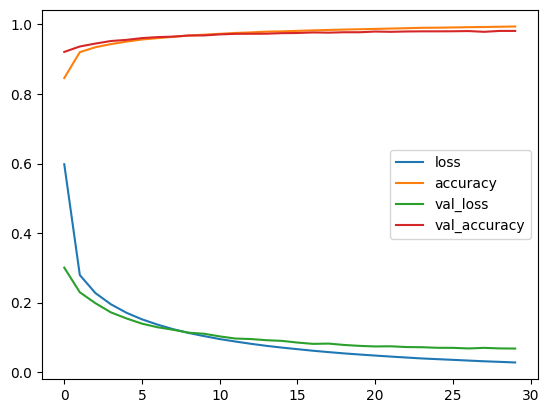

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9781


[0.06801962852478027, 0.9781000018119812]

SAMPLE CHECK - TEST DATA

In [ ]:
X_new = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

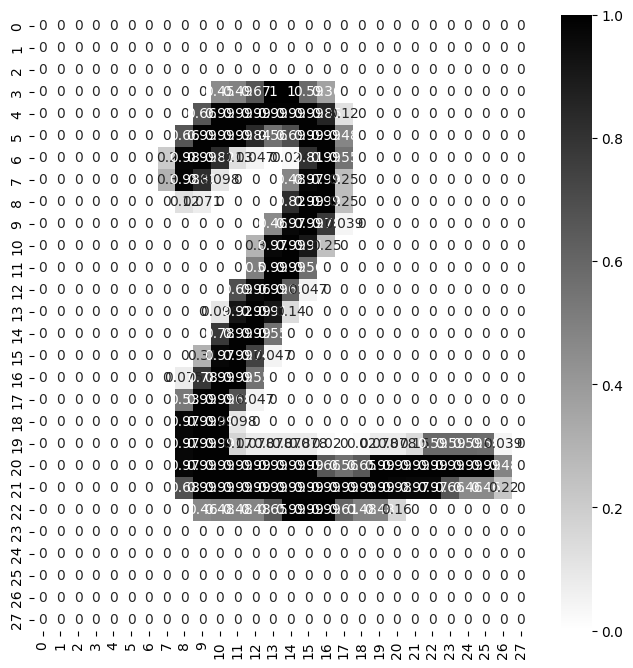

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(X_test[1], annot = True, cmap = "binary")

In [ ]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob

array([[1.02410411e-06, 1.02526144e-07, 2.41482721e-05, 8.51291639e-04,
        1.47970725e-09, 5.08987250e-06, 3.86263764e-11, 9.99099493e-01,
        3.55411146e-07, 1.84064247e-05],
       [1.02281422e-06, 5.06553370e-05, 9.99806225e-01, 1.39826399e-04,
        3.96354581e-11, 3.84776428e-07, 2.46361196e-07, 2.46057098e-11,
        1.68621318e-06, 1.04872122e-12],
       [4.81807092e-06, 9.98361409e-01, 2.20700793e-04, 3.01444943e-05,
        1.91555708e-04, 5.20125905e-05, 8.21926951e-05, 7.80320261e-04,
        2.71911733e-04, 4.93885182e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred


array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

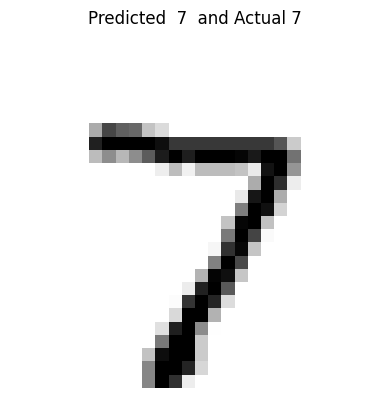

#############################


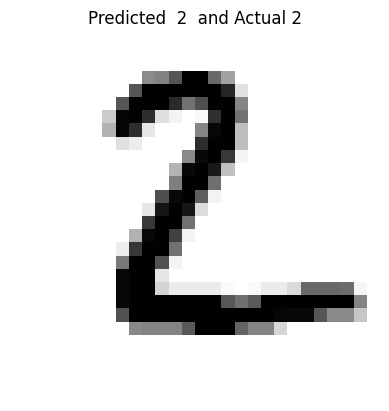

#############################


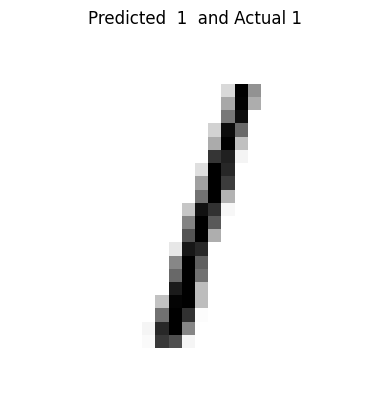

#############################


In [ ]:
## Ploting

for data, pred, actual_data in zip(X_new,y_pred,actual):
  plt.imshow(data, cmap = "binary")
  plt.title(f"Predicted  {pred}  and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("#############################")